# Decision tree model

## importing necessary model and files

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Introduction to problem set
The Boston dataset is a classic dataset for regression tasks in machine learning. It contains 506 samples, each with 13 features representing various aspects of housing in Boston suburbs. The goal is to predict the median value of owner-occupied homes. It's commonly used for regression model evaluation and benchmarking.

objective of this ML model is to make a decision tree model to predict the price of house base on 13 independent paramter. decison tree is a supervised machine learning algorithm used for classification and regression tasks. It recursively splits the dataset into subsets based on the value of input features, creating a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the predicted outcome. The algorithm selects the best feature to split the data at each node based on criteria such as information gain or Gini impurity. Decision trees are interpretable, handle both numerical and categorical data, and are prone to overfitting, which can be mitigated using techniques like pruning or ensemble methods.

In [2]:
df = pd.read_csv(r"E:\upload\linear_regression\boston.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# introduction to dataset

The Boston dataset consists of 13 variables:

CRIM: Per capita crime rate by town.
ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: Proportion of non-retail business acres per town.
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
NOX: Nitric oxides concentration (parts per 10 million).
RM: Average number of rooms per dwelling.
AGE: Proportion of owner-occupied units built prior to 1940.
DIS: Weighted distances to five Boston employment centers.
RAD: Index of accessibility to radial highways.
TAX: Full-value property tax rate per $10,000.
PTRATIO: Pupil-teacher ratio by town.
B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town.
LSTAT: Percentage of lower status of the population.
These variables capture various socioeconomic, demographic, and geographical characteristics of Boston suburbs, providing insights into factors affecting housing prices.


## basic EDA

In [3]:
print(f"Shape of dataframe: {df.shape}")

Shape of dataframe: (506, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  Price       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [5]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(f"total number of null value: {df.isna().sum().sum()}")

total number of null value: 0


In [7]:
df.rename(columns={df.columns[0]: 'A'}, inplace=True)

In [8]:
#removing the index columns
df.drop("A", axis = 1, inplace = True)

## Data visualisation

In [12]:
df_col = df.columns

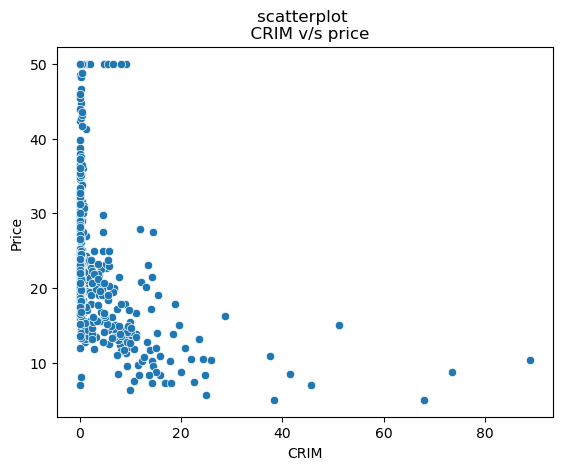

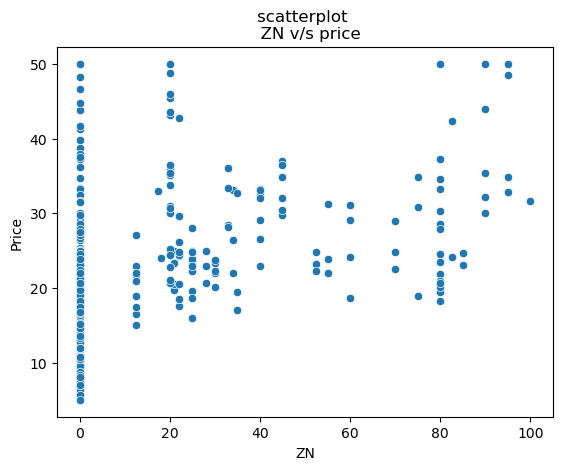

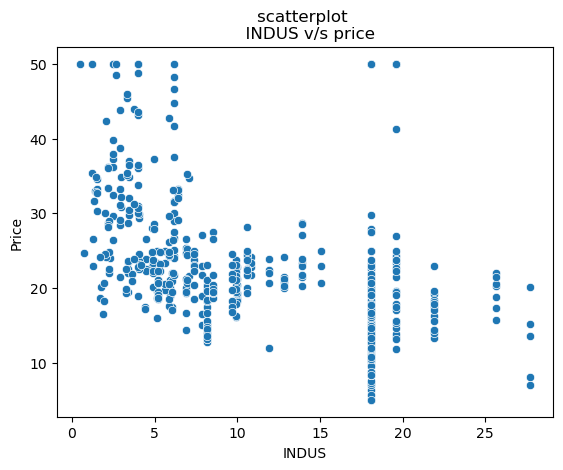

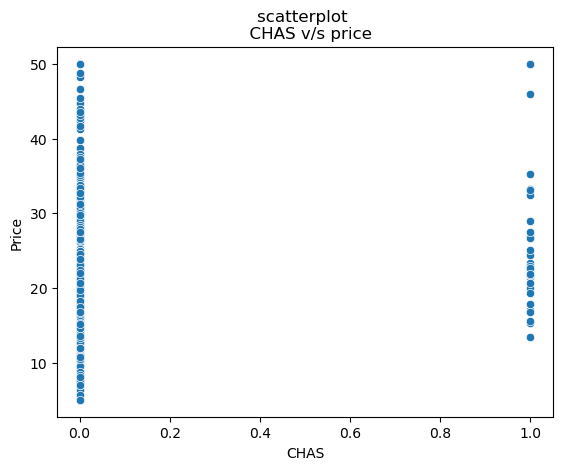

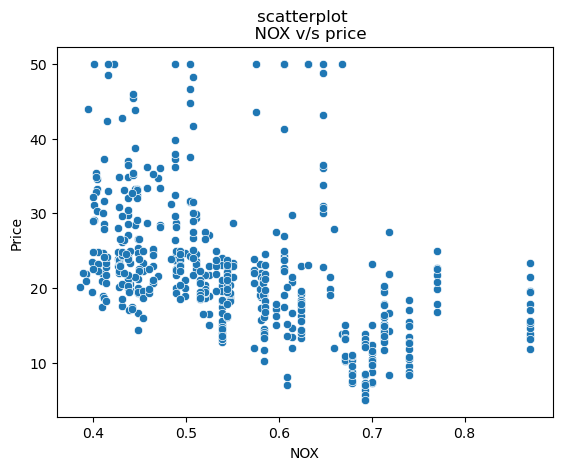

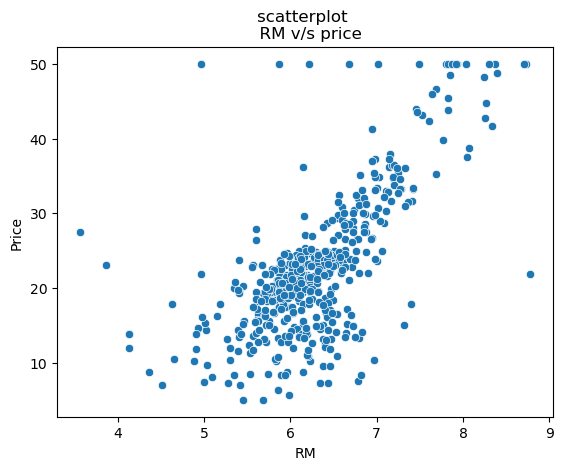

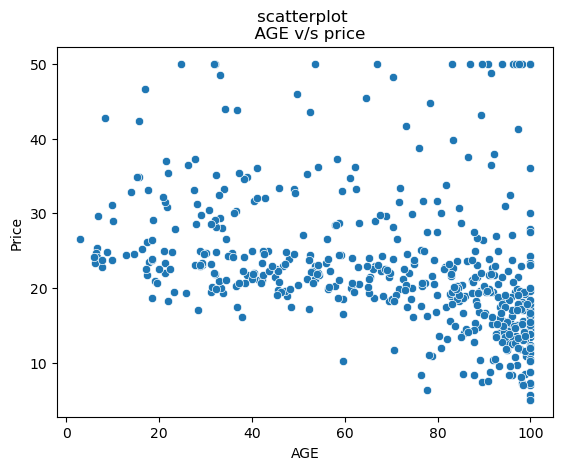

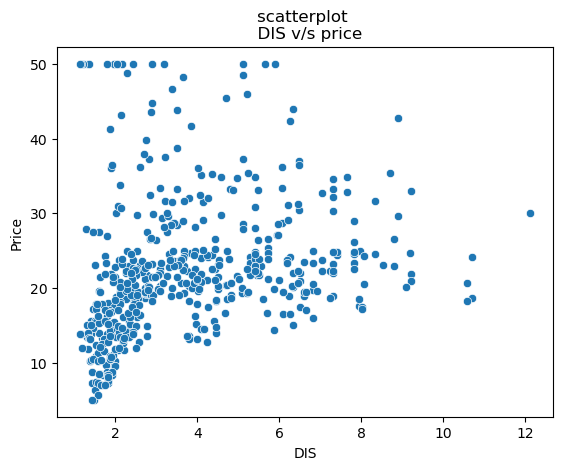

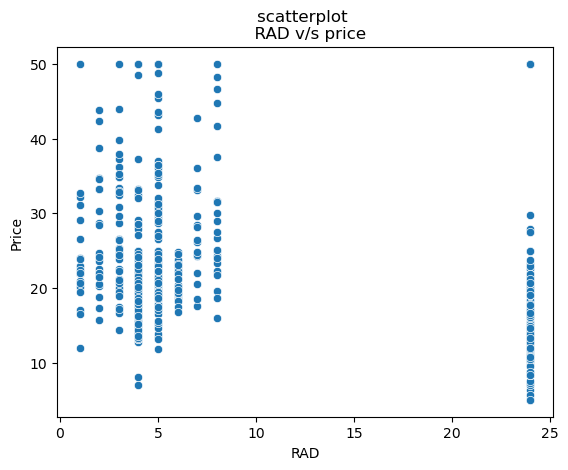

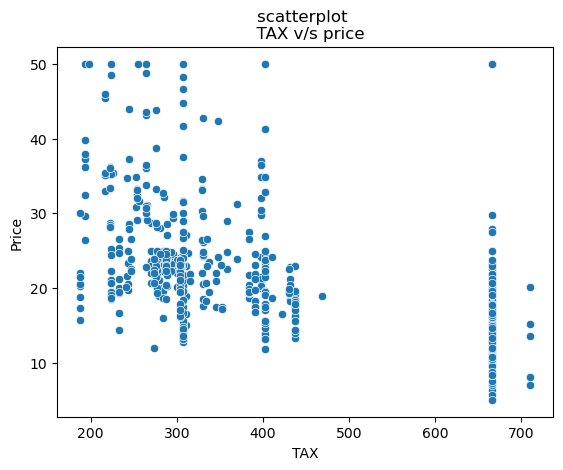

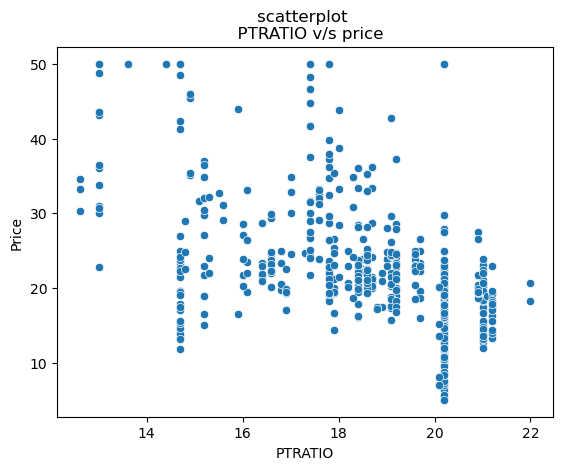

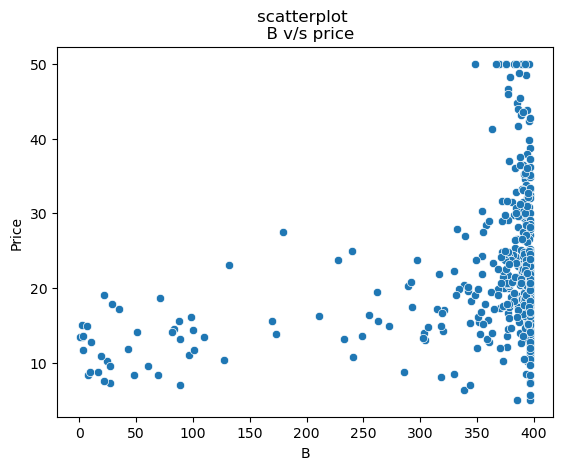

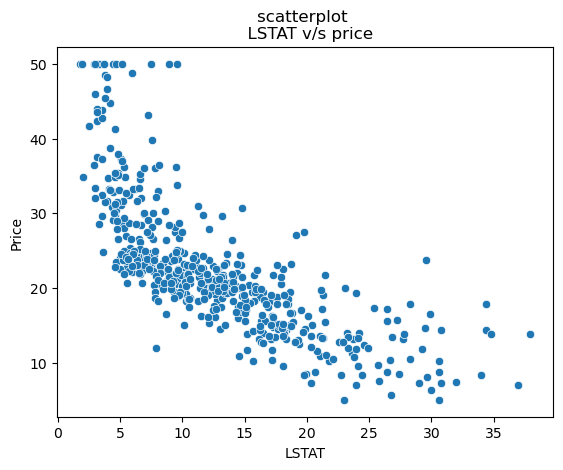

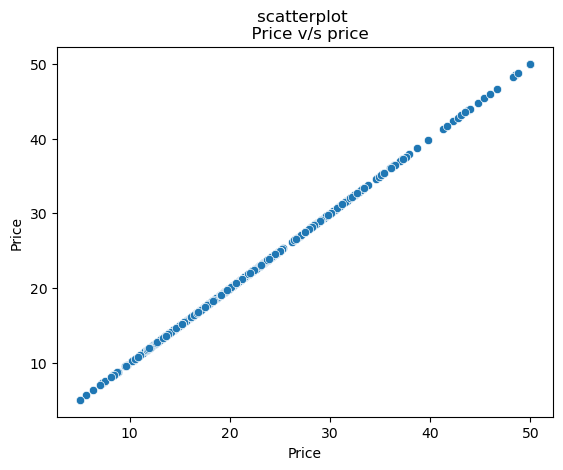

In [16]:
for i in df_col:
    sns.scatterplot(x=df[i] , y= df["Price"])
    plt.title(f"scatterplot \n  {i} v/s price")
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

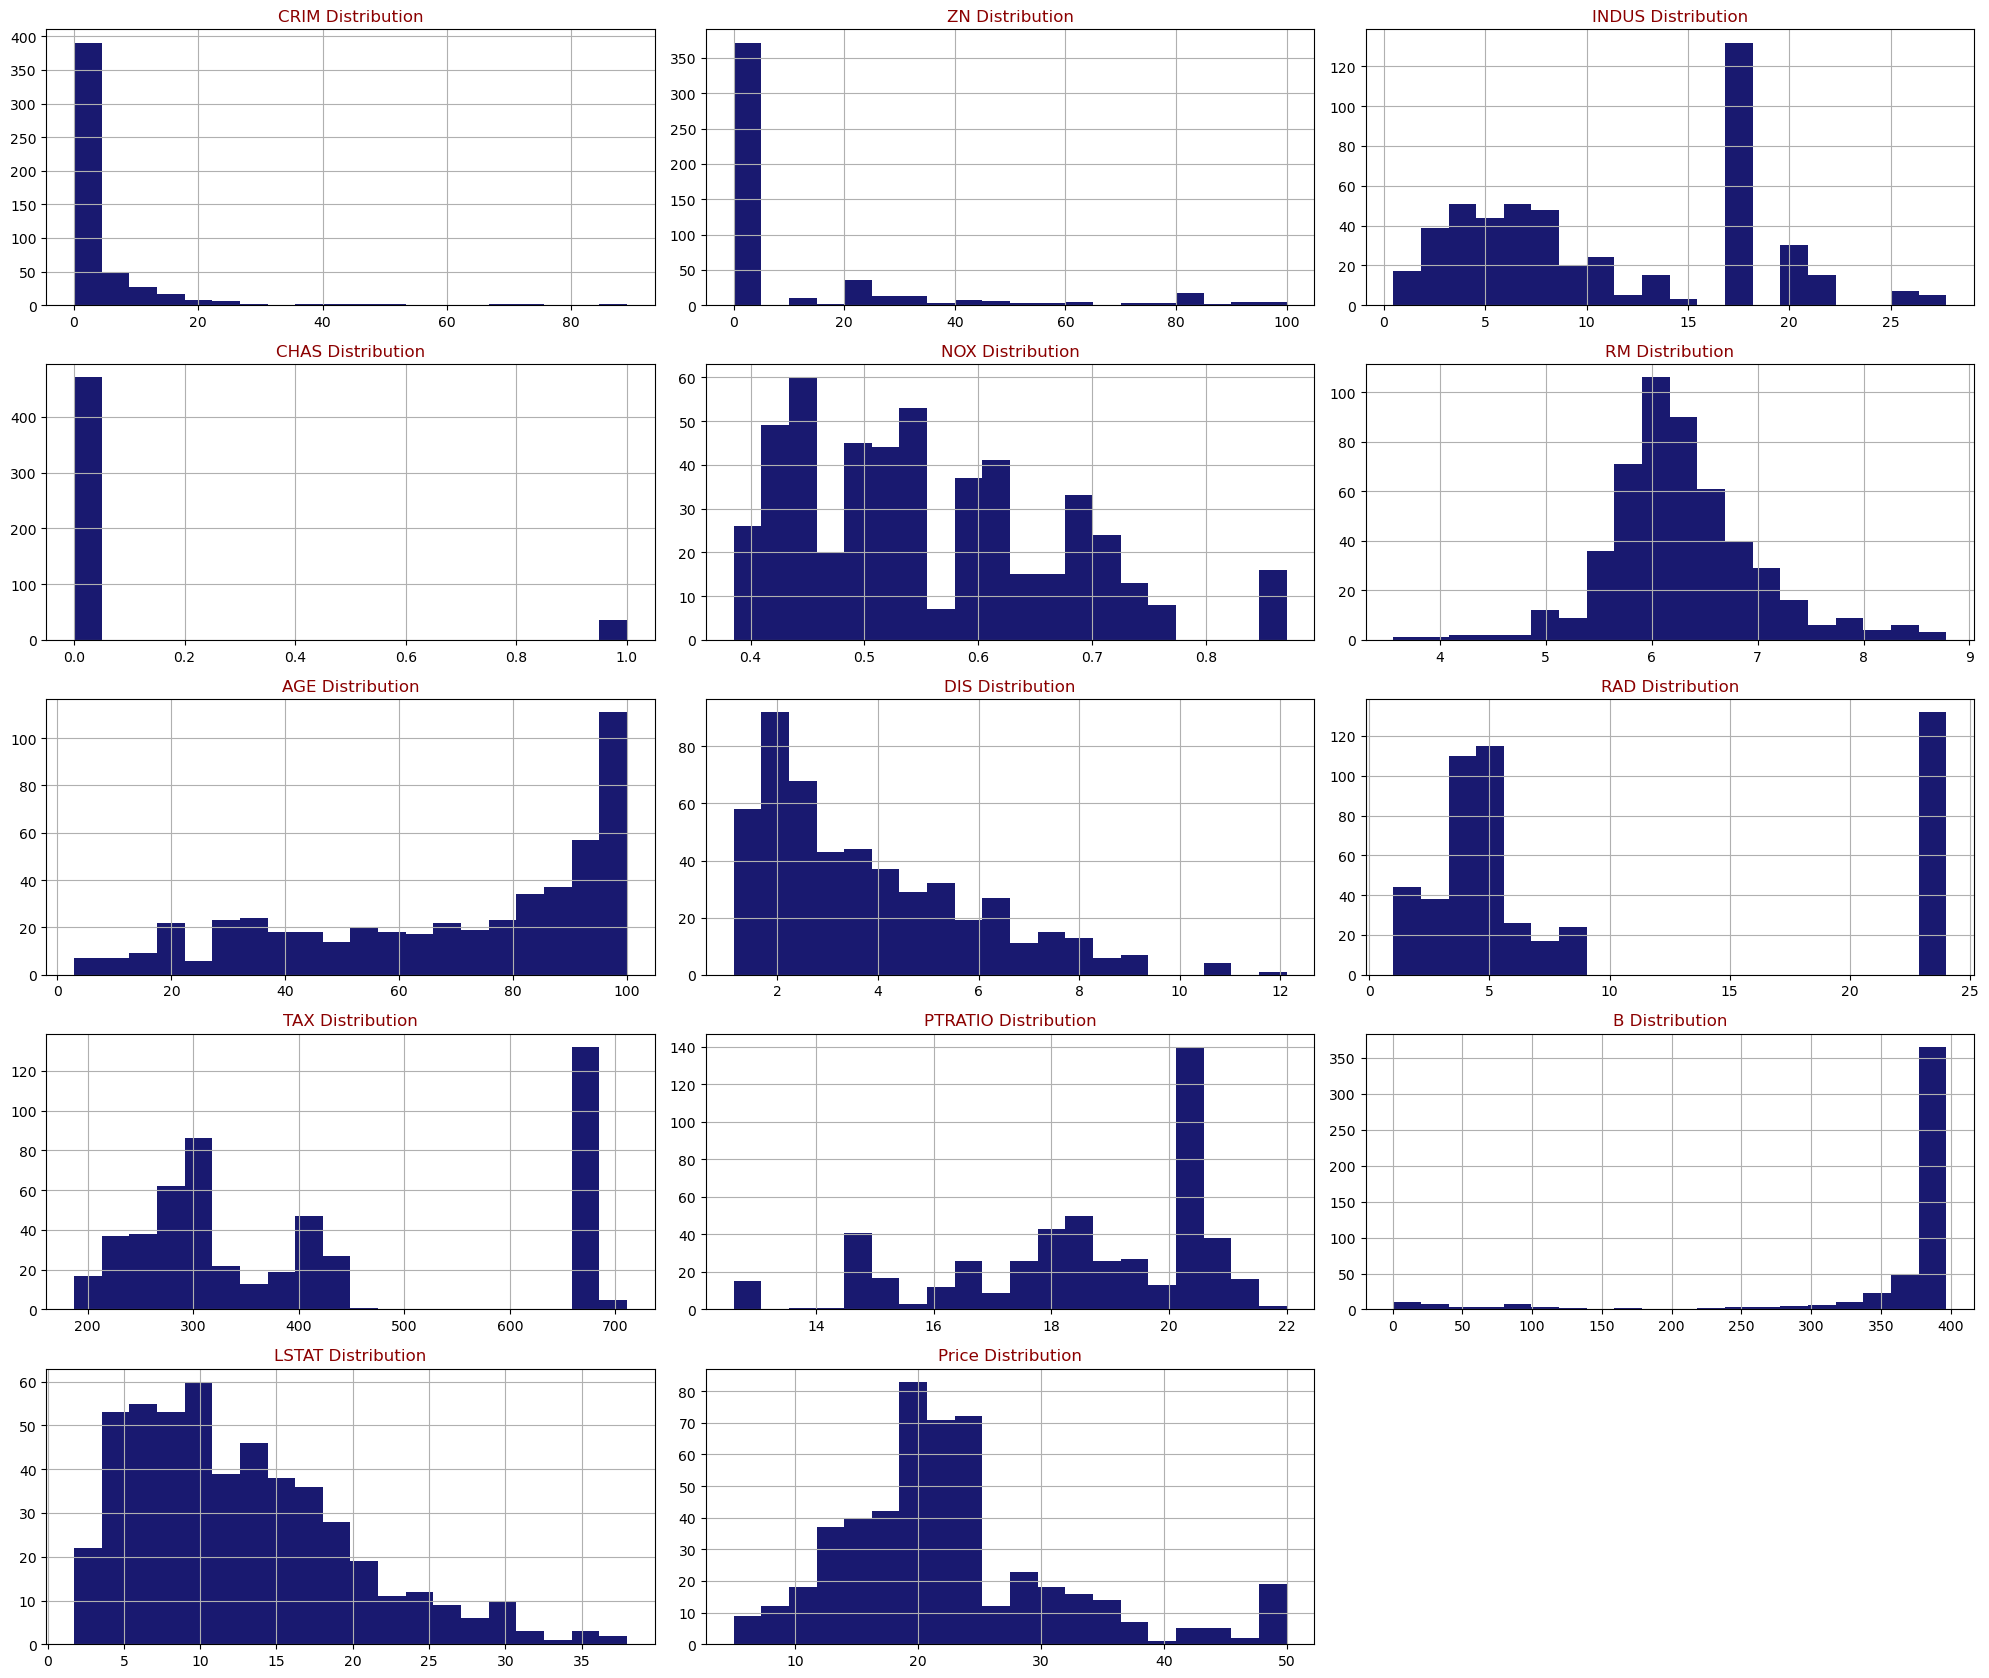

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

## variable inflation factor 
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [20]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)


   features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [21]:
df = df.drop("RM", axis = 1)

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)


   features        VIF
0      CRIM   2.098783
1        ZN   2.673723
2     INDUS  13.978348
3      CHAS   1.147038
4       NOX  55.588774
5       AGE  20.450687
6       DIS  14.220507
7       RAD  15.103835
8       TAX  61.225901
9   PTRATIO  66.103989
10        B  19.643808
11    LSTAT   8.547346


In [23]:
df = df.drop("PTRATIO", axis = 1)

In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

   features        VIF
0      CRIM   2.095455
1        ZN   2.433975
2     INDUS  13.958978
3      CHAS   1.141165
4       NOX  50.491344
5       AGE  19.961762
6       DIS   9.573301
7       RAD  15.102917
8       TAX  58.686042
9         B  16.588839
10    LSTAT   8.480702


In [25]:
df = df.drop("TAX", axis = 1)

In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

  features        VIF
0     CRIM   2.095430
1       ZN   2.349024
2    INDUS  11.010840
3     CHAS   1.119830
4      NOX  46.856834
5      AGE  19.899777
6      DIS   9.086148
7      RAD   5.167844
8        B  16.435073
9    LSTAT   8.468935


In [27]:
df = df.drop("NOX", axis =1)

In [28]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

  features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


In [29]:
df = df.drop("AGE", axis = 1)

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

  features        VIF
0     CRIM   2.095211
1       ZN   2.313889
2    INDUS   8.205465
3     CHAS   1.106350
4      DIS   8.209371
5      RAD   4.689836
6        B  10.074224
7    LSTAT   6.856889


In [32]:
df = df.drop("B", axis = 1)

In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype != "object" and col != "Price":  # Correcting the logical operator
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

  features       VIF
0     CRIM  2.067135
1       ZN  2.299351
2    INDUS  6.900077
3     CHAS  1.086574
4      DIS  3.968908
5      RAD  4.678181
6    LSTAT  6.726973


In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,DIS,RAD,LSTAT,Price
0,0.00632,18.0,2.31,0.0,4.0900,1.0,4.98,24.0
1,0.02731,0.0,7.07,0.0,4.9671,2.0,9.14,21.6
2,0.02729,0.0,7.07,0.0,4.9671,2.0,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.0622,3.0,2.94,33.4
4,0.06905,0.0,2.18,0.0,6.0622,3.0,5.33,36.2


## Make a dataframe

In [35]:
x = pd.DataFrame(df.iloc[:, :-1])
y = pd.DataFrame(df.iloc[:,-1])

## Dividing data in train and test 

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [37]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test:  {x_test.shape}")
print(f"Shape of y_test:  {y_test.shape}")

Shape of x_train: (354, 7)
Shape of y_train: (354, 1)
Shape of x_test:  (152, 7)
Shape of y_test:  (152, 1)


## Model building

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train, y_train)

DecisionTreeRegressor()

In [39]:
y_pred = dtc.predict(x_test)
y_pred = pd.DataFrame(y_pred)

# finding rmse score

In [41]:
from sklearn import metrics
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean squared error:  34.33447368421053
Root Mean squared error:  5.859562584716587
mean absolute error:  4.2407894736842096
